## Project: Problem Statement - Credit Card Customer Segmentation
##    by Samir Karandikar

### AllLife Credit Card Customer Segmentation
 
 
Background: AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.
 
Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.
 
Key Questions:
1.	How many different segments of customers are there?
2.	How are these segments different from each other?
3.	What are your recommendations to the bank on how to better market to and service these customers?
 
Data Description: Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.
•	Customer key - Identifier for the customer
•	Average Credit Limit - Average credit limit across all the credit cards
•	Total credit cards - Total number of credit cards
•	Total visits bank - Total number of bank visits
•	Total visits online - total number of online visits
•	Total calls made - Total number of calls made by the customer


## Import Libraries

In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA

## Load and Review Data

In [2]:
Data = pd.ExcelFile("Credit Card Customer Data.xlsx")  
print(Data.sheet_names) #this returns the names of all the sheets in the excel file

['Sheet1']


In [3]:
Data_df = Data.parse('Sheet1')
Data_df.head(10)
# The data in Sheet1 is parsed to Data_df dataframe and we inspect the top 10 rows

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [4]:
Data_df.info()
#We view the information about each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
# Credit card data has been copied into Data Frame Data_df
# In general, the 660 rows of data has no no null values and it is all integer data type.
# After confirming this we start the Univariate analysis step.

## 1. Univariate Analysis
       Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)

In [6]:
Data_df_features = Data_df.drop(columns = {'Sl_No', 'Customer Key'})
#Since the customer key and Sl_no information may be useful in using the results, we retain this data under Data_df
# A new data frame is created in order to analyze the features in which Sl_No and Customer Key are not copied.
# leaving the features in the data only. 

In [7]:
Data_df_features.describe().T
#This function shows the variables at our disposal, min and max values as well as quartile cut-off values

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


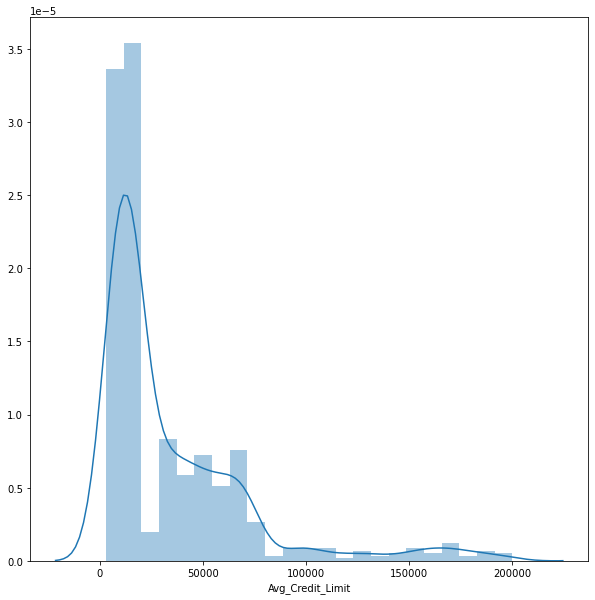

----------------------------------------------------


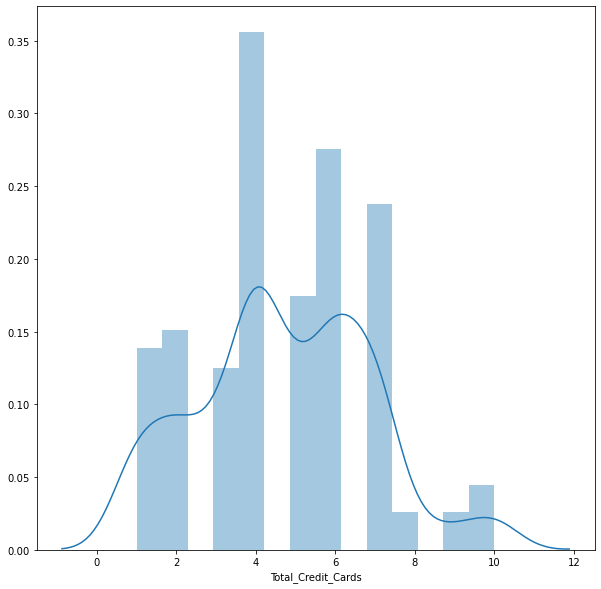

----------------------------------------------------


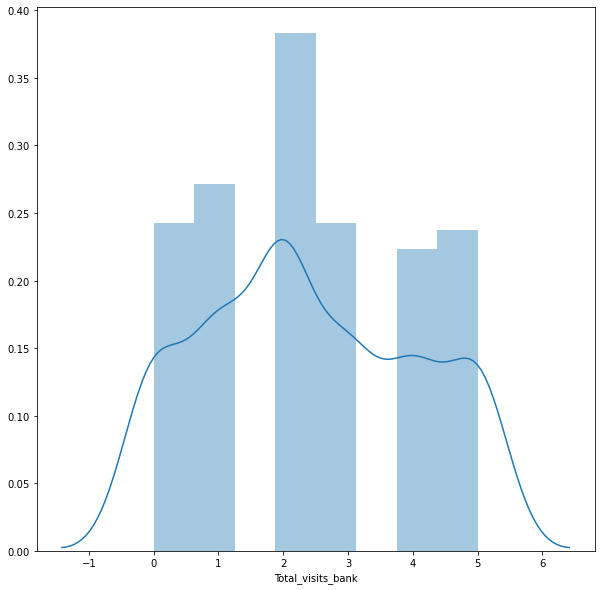

----------------------------------------------------


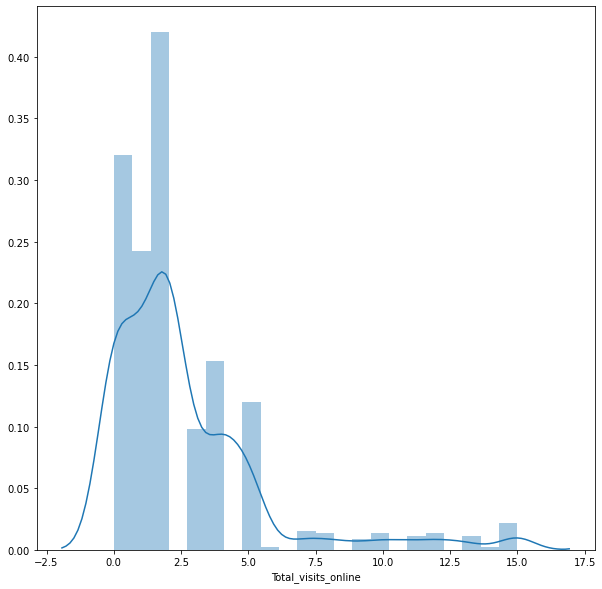

----------------------------------------------------


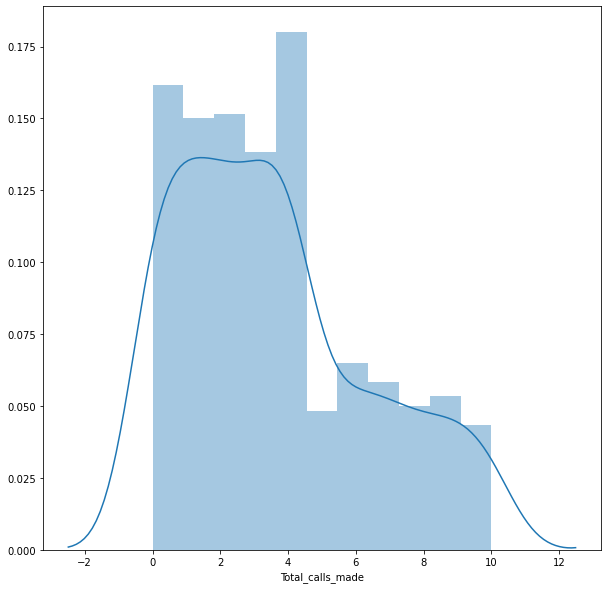

----------------------------------------------------


In [8]:
# The function creates a histogram of all independent variables. 
for feature in Data_df_features.columns: # Loop through all columns in the dataframe
    plt.figure(figsize = (10,10))
    sns.distplot(Data_df_features[feature])
    plt.show()
    print('----------------------------------------------------')
    

In [9]:
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

Data_scaled=Data_df_features.apply(zscore)

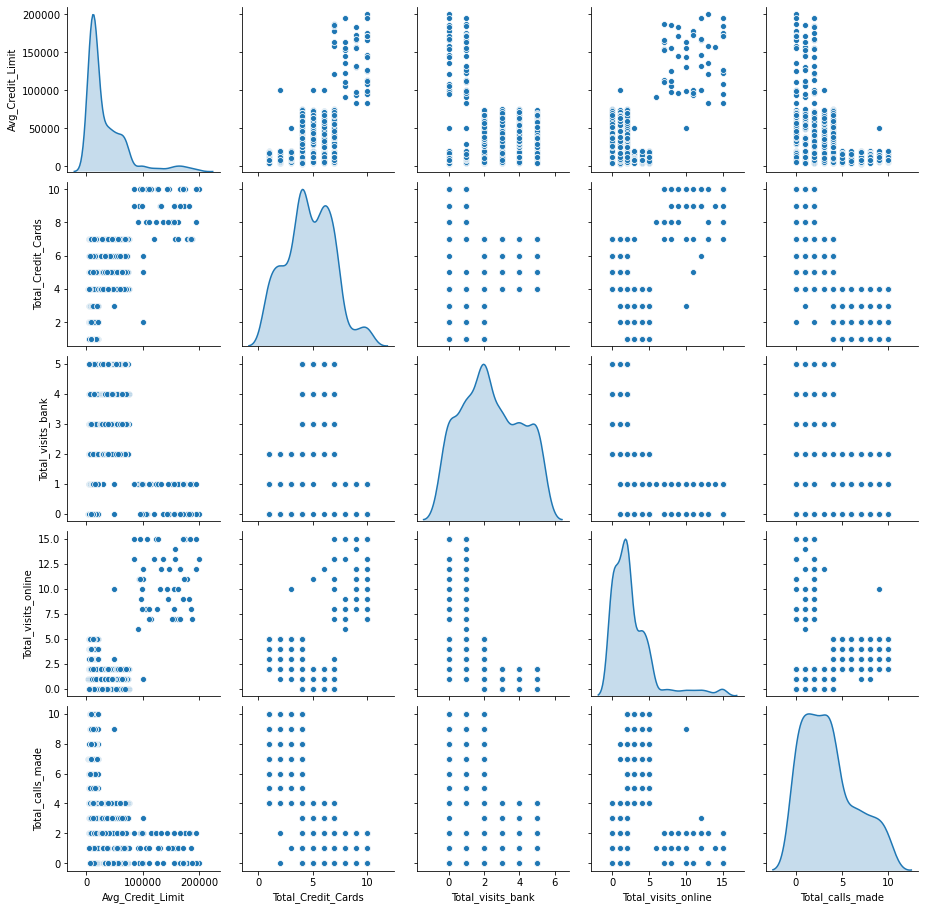

In [10]:
import seaborn as sns
sns.pairplot(Data_df_features, diag_kind='kde') 

## 2.	Insight from the Graphs
    Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)

In [11]:
#Total Visits to Bank appears to be the most important feature that forms three distinct clusters. Customers
# with high visits to bank have lower online visits. 
#Average Credit Limit appears to be an important feature. There is some correlation with Total Credit Cards; higher 
# the average credit limit, the individual has more credit cards, makes less visits to bank, higher online visits 
# makes less calls. We could potentially look for cluster of customers with higher, average and lower credit limit. 
# Total credit cards and Total visits online seem to form two distinct clusters with people with >5 online visits
# and these customers tend to have more than 7 credit cards.  
# Customers making more (5-10)phone calls appear to have lower average credit limit.

## 3.	K-Means Clustering
Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

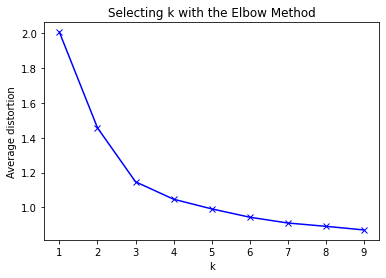

In [12]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Data_scaled)
    prediction=model.predict(Data_scaled)
    meanDistortions.append(sum(np.min(cdist(Data_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / Data_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [13]:
# Let us first start with K = 2 where we see an elbow in the graph above
first_model=KMeans(2)
first_model.fit(Data_scaled)
prediction=first_model.predict(Data_scaled)

In [14]:
#Append the prediction
Data_df["Group"] = prediction
Data_df_features["Group"] = prediction
Data_scaled["Group"] = prediction
print("Groups Assigned: \n")
Data_df_features.head(10)

Groups Assigned: 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,0
5,20000,3,0,1,8,1
6,100000,5,0,11,2,0
7,15000,3,0,1,1,1
8,5000,2,0,2,2,1
9,3000,4,0,1,7,1


### Let us analyze the clusters using Box plot

In [15]:
DataClust = Data_df_features.groupby(['Group'])
DataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,46082.568807,5.885321,3.158257,2.119266,1.894495
1,12174.107143,2.410714,0.933036,3.553571,6.870536


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F393F9550>,
      dtype=object)

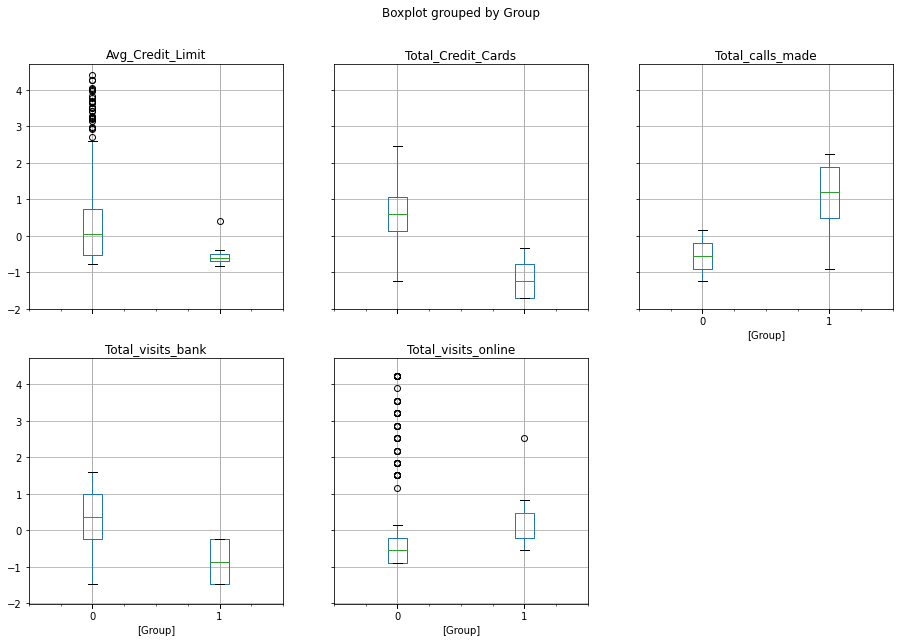

In [16]:
Data_scaled.boxplot(by='Group', layout = (2,3),figsize=(15,10))

### Clusters do not appear to be well-defined
Group 1 seems to be made of customers with higher credit limit, higher total cards and lower calls made as well as less no of visits to the bank. 
There seems to be some overlap in Total on-line visits between Group 1 and Group 0. 
This does not appear to be well defined clustering. 
 
### We will try with K=3 which is the next elbow in the curve shown above.

In [17]:
# Let us try next with K = 3
second_model=KMeans(3)
second_model.fit(Data_scaled)
prediction=second_model.predict(Data_scaled)

#Append the prediction to the data frames
Data_df["Group"] = prediction
Data_scaled["Group"] = prediction
Data_df_features["Group"] = prediction
print("Groups Assigned : \n")
Data_df.head()

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,0


In [18]:
DataClust = Data_df_features.groupby(['Group'])
DataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000
1,33782.383420,5.515544,3.489637,0.981865,2.000000
2,12174.107143,2.410714,0.933036,3.553571,6.870536


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F399E99D0>,
      dtype=object)

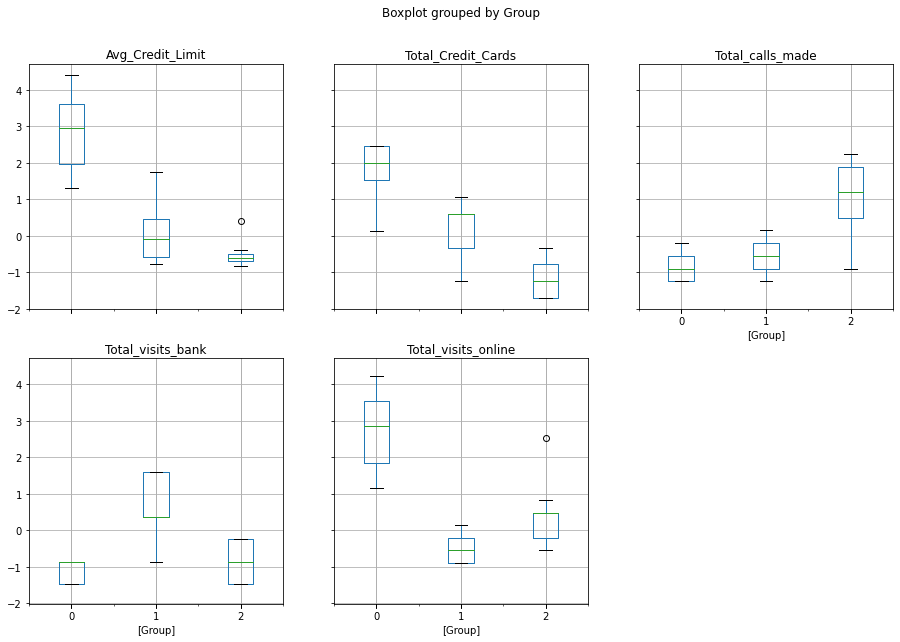

In [19]:
Data_scaled.boxplot(by='Group', layout = (2,3),figsize=(15,10))

## We appear to be getting more distinct clusters with K = 3
* Group 0 appears to be made of high average credit limit, highest no. of credit cards, lower total calls and visits to the bank, and highest online visits to the bank.
* Group 1 appears to be made of average credit limit being average of the total, average total credit cards, lower calls made, highest no. of visits to the bank and lowest no. of visits online. 
* Group 2 appears to be made of low average credit limit, lowest no. of credit cards, high total calls made to the bank, lower total visits to bank and average visits on-line.  

## 4.	Hierarchical Clustering - 
    Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

In [20]:
from sklearn.cluster import AgglomerativeClustering 

In [21]:
hier_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
#Hierarchical model is defined with 3 clusters, affinity is euclidean distance and with average linkage measurements

In [22]:
Data_scaled1 = Data_scaled.drop("Group", axis = 1)
hier_model.fit(Data_scaled1)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [23]:
Data_df["labels"] = hier_model.labels_
Data_scaled1["labels"] = hier_model.labels_
Data_df_features["labels"] = hier_model.labels_

In [24]:
HierDataClust = Data_df.groupby(['labels'])
HierDataClust.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
labels,,,,,,,,
0,417.260982,54925.966408,33713.178295,5.511628,3.485788,0.984496,2.005168,1.002584
1,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,0.000000
2,116.977578,55163.973094,12197.309417,2.403587,0.928251,3.560538,6.883408,2.000000


In [25]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [26]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [27]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
# Use of Method "Average"

Z = linkage(Data_scaled1, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(Data_scaled1))

c

0.9252387749820263

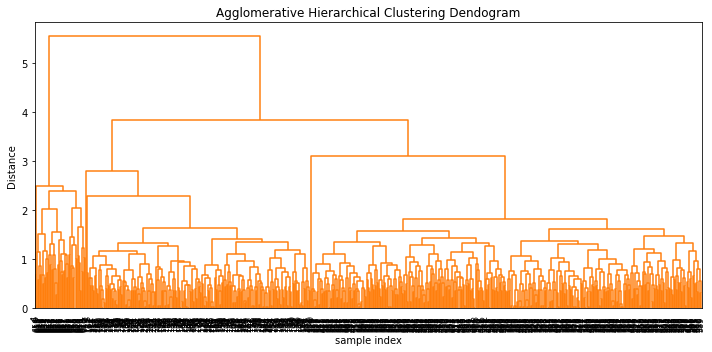

In [28]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()
#At the distance of 3.5 we get three clusters

In [29]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
# Use of Method "complete"

Z = linkage(Data_scaled1, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(Data_scaled1))

c

0.9181204166982053

In [30]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
# Use of Method "Average"

Z = linkage(Data_scaled1, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(Data_scaled1))

c

0.8170227112271451

##  As you can see the average method obtains the best cophonetic coefficient of 0.925

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F3B87AAC0>,
      dtype=object)

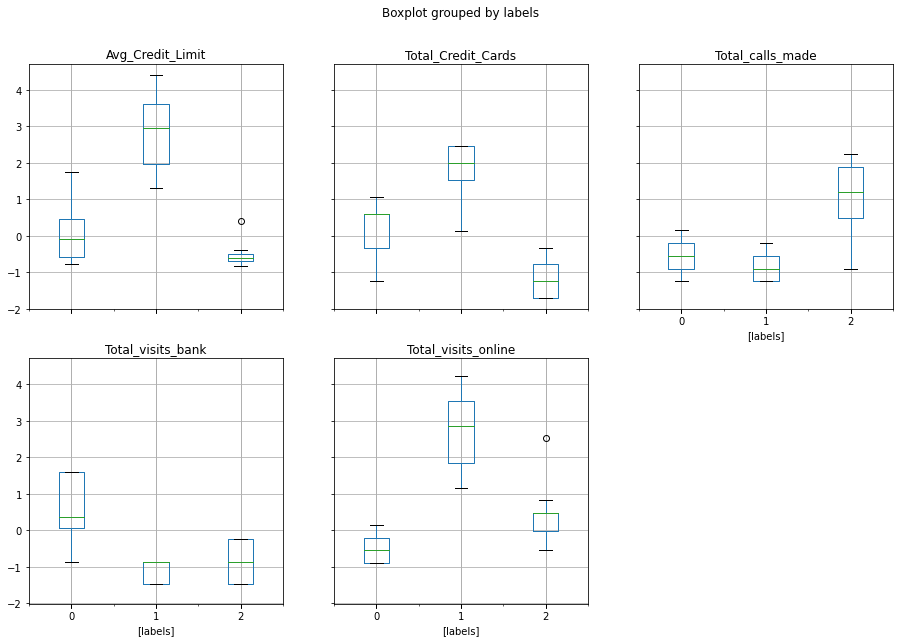

In [31]:
# This code creates the boxplot of the labels created by Hierarchical Clustering
Data_scaled1.boxplot(by='labels', layout = (2,3),figsize=(15,10))

## 5.	Average Silhoutte Score
    Calculate average silhouette score for both methods. (5 marks)

In [32]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [33]:
centroids  = second_model.cluster_centers_

In [34]:
Data_scaled2 = Data_scaled.drop("Group", axis =1)
# get silhouette
silhouette_vals = silhouette_samples(Data_scaled2,prediction)
    #silhouette_vals
    #
# Calculate Silhoutte Score
# Silhoutte score between 0 and 1 is a good score with the score closer to 1 being better
score = silhouette_score(Data_scaled2, second_model.labels_, metric='euclidean')

In [35]:
print('KMeans Model K=3, Silhouette Score: %.6f' % score)

KMeans Model K=3, Silhouette Score: 0.515718


In [36]:
# Calculate Silhoutter Score for Hierarchical Model
Data_scaled4 = Data_scaled1.drop("labels", axis =1)
# get silhouette
silhouette_vals = silhouette_samples(Data_scaled4,hier_model.labels_)
    #silhouette_vals
    #
# Calculate Silhoutte Score
#
score2 = silhouette_score(Data_scaled4, hier_model.labels_, metric='euclidean')
print('Hierarchical Model, Silhouette Score: %.6f' % score2)

Hierarchical Model, Silhouette Score: 0.515922


## Hierarchical Model provides slightly higher Silhoutte score than KMeans Model

## 6.	Comparison between K-Means clusters and Hierarchical Cluster
Compare K-means clusters with Hierarchical clusters. (5 marks)

In [37]:
Data_df.head(20)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group,labels
0,1,87073,100000,2,1,1,0,1,0
1,2,38414,50000,3,0,10,9,2,2
2,3,17341,50000,7,1,3,4,1,0
3,4,40496,30000,5,1,1,4,1,0
4,5,47437,100000,6,0,12,3,0,1
5,6,58634,20000,3,0,1,8,2,2
6,7,48370,100000,5,0,11,2,0,1
7,8,37376,15000,3,0,1,1,2,2
8,9,82490,5000,2,0,2,2,2,2
9,10,44770,3000,4,0,1,7,2,2


In [62]:
#There appears to be a good equivalence between KMeans Group and Hierarchical Clustering labels
# Group 0 ~ label 1
# Group 1 ~ label 0
# Group 2 ~ label 2
i=0
match_g0_l1 = 0
No_match_g0_l1 = 0
match_g1_l0 = 0
No_match_g1_l0 = 0
match_g2_l2 = 0
No_match_g2_l2 = 0

# We run a loop for loop through Dataframe Data_df which has Group and labels definition 
# A comparison is made of the equivalent clusters in order to draw conclusions.
#
for i in range(len(Data_df)):
    if Data_df['Group'][i]==0 and Data_df['labels'][i]==1:
        match_g0_l1 = match_g0_l1 +1
    else:
        if Data_df['Group'][i]==1 and Data_df['labels'][i]==0:
            match_g1_l0 = match_g1_l0 +1
        else:  
            if Data_df['Group'][i]==2 and Data_df['labels'][i]==2:
                match_g2_l2 = match_g2_l2 +1
    if Data_df['Group'][i]==0 and Data_df['labels'][i]!=1:
        No_match_g0_l1 = No_match_g0_l1+1
    if Data_df['Group'][i]==1 and Data_df['labels'][i]!=0:
        No_match_g1_l0 = No_match_g1_l0+1
    if ((Data_df['Group'][i]==2)&(Data_df['labels'][i]!=2)):
        No_match_g2_l2 = No_match_g2_l2+1
    i=i+1
print( 'Group 0 matches with label 1:', match_g0_l1)  
print('Group 1 matches with label 0: ', match_g1_l0 )
print('Group 2 matches with label 2:', match_g2_l2, '\n')
print('No match between Group 0 and label 1:', No_match_g0_l1)
print("Percentage of total = "+"{0:.4f}%".format(No_match_g0_l1/6.6)) 
print('No match between Group 1 and label 0:', No_match_g1_l0)
print("Percentage of total = "+"{0:.4f}%".format(No_match_g1_l0/6.6)) 
print('No match between Group 2 and label 2:', No_match_g2_l2)
print("Percentage of total = "+"{0:.4f}%".format(No_match_g2_l2/6.6)) 

Group 0 matches with label 1: 50
Group 1 matches with label 0:  386
Group 2 matches with label 2: 223 

No match between Group 0 and label 1: 0
Percentage of total = 0.0000%
No match between Group 1 and label 0: 0
Percentage of total = 0.0000%
No match between Group 2 and label 2: 1
Percentage of total = 0.1515%


### When KMeans Clusters and Hierarchical Clusters are compared there is equivalence in 659 out of 660 records.
### There is only record which is assigned Group 2 by KMeans but does not get assigned equivalent label 2 by Hierarchical Clustering program.

In [40]:
writer = pd.ExcelWriter('output.xlsx')
# write dataframe to excel to study the data independently
Data_df.to_excel(writer)
# save to excel
writer.save()

## 7.	Analysis of the clusters formed
    Tell us how is one cluster different from another and answer all the key questions. (10 marks)

In [66]:
DataClust.describe().T

Group                                  0              1             2
Avg_Credit_Limit    count      50.000000     386.000000    224.000000
                    mean   141040.000000   33782.383420  12174.107143
                    std     34457.877272   22169.460696   5249.048524
                    min     84000.000000    5000.000000   3000.000000
                    25%    108750.000000   13000.000000   8000.000000
                    50%    145500.000000   31000.000000  12000.000000
                    75%    170000.000000   52000.000000  16000.000000
                    max    200000.000000  100000.000000  50000.000000
Total_Credit_Cards  count      50.000000     386.000000    224.000000
                    mean        8.740000       5.515544      2.410714
                    std         1.274715       1.140069      1.100783
                    min         5.000000       2.000000      1.000000
                    25%         8.000000       4.000000      1.000000
                    50%         9.000000       6.000000      2.000000
                    75%        10.000000       6.000000      3.000000
                    max        10.000000       7.000000      4.000000
Total_visits_bank   count      50.000000     386.000000    224.000000
                    mean        0.600000       3.489637      0.933036
                    std         0.494872       1.135563      0.803567
                    min         0.000000       1.000000      0.000000
                    25%         0.000000       3.000000      0.000000
                    50%         1.000000       3.000000      1.000000
                    75%         1.000000       5.000000      2.000000
                    max         1.000000       5.000000      2.000000
Total_visits_online count      50.000000     386.000000    224.000000
                    mean       10.900000       0.981865      3.553571
                    std         2.880264       0.857167      1.218978
                    min         6.000000       0.000000      1.000000
                    25%         8.000000       0.000000      2.000000
                    50%        11.000000       1.000000      4.000000
                    75%        13.000000       2.000000      4.000000
                    max        15.000000       3.000000     10.000000
Total_calls_made    count      50.000000     386.000000    224.000000
                    mean        1.080000       2.000000      6.870536
                    std         0.876915       1.430648      1.990161
                    min         0.000000       0.000000      1.000000
                    25%         0.000000       1.000000      5.000000
                    50%         1.000000       2.000000      7.000000
                    75%         2.000000       3.000000      9.000000
                    max         3.000000       4.000000     10.000000
labels              count      50.000000     386.000000    224.000000
                    mean        1.000000       0.000000      1.991071
                    std         0.000000       0.000000      0.133631
                    min         1.000000       0.000000      0.000000
                    25%         1.000000       0.000000      2.000000
                    50%         1.000000       0.000000      2.000000
                    75%         1.000000       0.000000      2.000000
                    max         1.000000       0.000000      2.000000

### Group 0 or Label 1 : 50 Customers 
This is the smallest cluster and it is made of the highest average credit limit (range 84k-200k, mean =141k), high number of total credit cards(5-10, mean of 8.74), and high on-line visits (6-15 visits, mean of 10.9). 
This cluster has lower total bank visits (0-1 with mean of 0.6) and total calls (0-3 with mean of 1.08). The appropriate method to catch their attention would be through Online advertising. 

### Group 1 or Lable 0: 386 Customers
This is the largest cluster of customers. This cluster is made of middle range of average credit limit (range 5k-100k, mean = 33.8k), medium number of credit cards (range 2-7, mean=5.5) and high visits to bank (1-5, mean = 3.5).
This cluster has the lowest total online visits (range 0-3, mean = 0.98) and low calls made (range 0-4, mean = 2). The appropriate method to catch these customers is by person to person contact in the bank during their visit. 

### Group 2 or Label 2: 224 Customers
This is the second largest cluster of customers. This cluster is made of the lowest range of average credit limit (3k-50k, mean = 12k), lowest number of credit cards (1-4, mean 2.4) and highest phone calls (1-10, mean 6.87).
This cluster has medium on-line visits (1-10, mean 3.55) and the lowest visits to bank (0-2, mean 0.93) The appropriate method to catch attention of these customers would be when they make a phone call. 

## Answers to key questions-

### 1.	How many different segments of customers are there?

There are three (3) segments of customers. 

### 2.	How are these segments different from each other?

As described in the paragraph above the three segments are characterized by features- The first cluster (Group 0) with highest average credit limit and number of credit cards seems to be using on-line method to contact bank. 
The next cluster (Group 1) with medium credit limit is the largest and would be the appropriate cluster to increase penetration. 
The third cluster (Group 2) is the lowest credit limit group and they don't have many credit cards. 

### 3.	What are your recommendations to the bank on how to better market to and service these customers?
Group 0 - It would be important to improve the on-line support services to please these customers. 
Group 1 - This cluster makes maximum visits to the bank and that would be the most appropriate area to support these customers. 
Group 2 - This group could be marketed for signing up for credit cards via phone calls. This group prefers making phone calls. 